In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [36]:
grb_all = pd.read_csv('Data/grb_data.csv')

In [37]:
grb_all.head(20)

,GRB,Swift Trigger Number,BAT RA (J2000),BAT Dec (J2000),BAT T90,BAT Fluence (15-150 keV),BAT Photon Index (15-150 keV) (PL = simple power-law),Swift Comments,Redshift,Host Galaxy
0,180905A,859421,91.038,-4.592,165.3,42.0,1.6,-,-,-
1,180904A,859282,274.26,46.64,5.4,2.4,1.02,UVOT: no detection,-,-
2,180828A,856977,268.704,-25.791,14.0,88.0,0.89,UVOT: no detection,-,-
3,180823A,855434,210.358,14.901,80.3,78.0,1.58,UVOT: no detection,-,-
4,180821A,854578,7.739,-38.612,64.0,14.0,1.79,UVOT: no detection,-,-
5,180818B,853882,104.227,39.31,134.4,23.0,1.77,UVOT: no detection,-,-
6,180818A,853824,169.698,-48.344,13.7,2.6,2.15,UVOT: no detection,-,-
7,180812A,852903,245.839,74.674,16.51,8.0,1.22,-,-,-
8,180809B,852553,299.712,-15.293,233.2,730.0,1.26,-,-,-
9,180805B,851855,25.877,-17.475,122.5,9.6,1.13,UVOT: no detection,-,-


In [39]:
grb_all.head()['Redshift'].dropna()

0    -
1    -
2    -
3    -
4    -
Name: Redshift, dtype: object

In [40]:
grb = grb_all.replace("-", np.nan)
grb.head()

,GRB,Swift Trigger Number,BAT RA (J2000),BAT Dec (J2000),BAT T90,BAT Fluence (15-150 keV),BAT Photon Index (15-150 keV) (PL = simple power-law),Swift Comments,Redshift,Host Galaxy
0,180905A,859421,91.038,-4.592,165.3,42.0,1.6,NaN,NaN,NaN
1,180904A,859282,274.26,46.64,5.4,2.4,1.02,UVOT: no detection,NaN,NaN
2,180828A,856977,268.704,-25.791,14.0,88.0,0.89,UVOT: no detection,NaN,NaN
3,180823A,855434,210.358,14.901,80.3,78.0,1.58,UVOT: no detection,NaN,NaN
4,180821A,854578,7.739,-38.612,64.0,14.0,1.79,UVOT: no detection,NaN,NaN


In [41]:
grb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1352 entries, 0 to 1351
Data columns (total 10 columns):
GRB                                                      1352 non-null object
Swift Trigger Number                                     1352 non-null object
BAT RA (J2000)                                           1346 non-null object
BAT Dec (J2000)                                          1346 non-null object
BAT T90                                                  1183 non-null object
BAT Fluence (15-150 keV)                                 1207 non-null object
BAT Photon Index (15-150 keV) (PL = simple power-law)    1037 non-null object
Swift Comments                                           937 non-null object
Redshift                                                 357 non-null object
Host Galaxy                                              89 non-null object
dtypes: object(10)
memory usage: 105.7+ KB


In [48]:
ra_red = grb[['BAT RA (J2000)', 'Redshift']].dropna()
ra_red.head()

,BAT RA (J2000),Redshift
11,253.574,0.117
15,0.528,0.654
24,318.096,2.855
26,357.514,1.1175
34,77.965,1.305


In [49]:
ra_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 11 to 1340
Data columns (total 2 columns):
BAT RA (J2000)    357 non-null object
Redshift          357 non-null object
dtypes: object(2)
memory usage: 8.4+ KB


In [50]:
ra_red['ra'] = bat_red['BAT RA (J2000)'].apply(lambda b : float(b))
ra_red['red'] = bat_red['Redshift'].apply(lambda r : float(r))
ra_red.head()

,BAT RA (J2000),Redshift,ra,red
11,253.574,0.117,253.574,0.1170
15,0.528,0.654,0.528,0.6540
24,318.096,2.855,318.096,2.8550
26,357.514,1.1175,357.514,1.1175
34,77.965,1.305,77.965,1.3050


/Users/janarthan/Installs/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


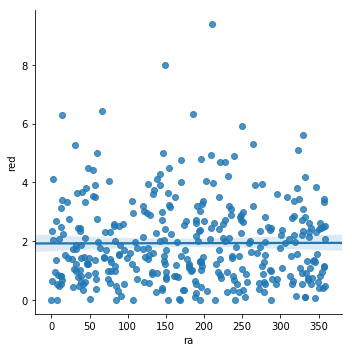

In [52]:
# BAT RA (J2000)    to    Redshift
sns.lmplot(x='ra', y='red', data=ra_red)

In [46]:
grb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1352 entries, 0 to 1351
Data columns (total 10 columns):
GRB                                                      1352 non-null object
Swift Trigger Number                                     1352 non-null object
BAT RA (J2000)                                           1346 non-null object
BAT Dec (J2000)                                          1346 non-null object
BAT T90                                                  1183 non-null object
BAT Fluence (15-150 keV)                                 1207 non-null object
BAT Photon Index (15-150 keV) (PL = simple power-law)    1037 non-null object
Swift Comments                                           937 non-null object
Redshift                                                 357 non-null object
Host Galaxy                                              89 non-null object
dtypes: object(10)
memory usage: 105.7+ KB


In [53]:
grb.head()

,GRB,Swift Trigger Number,BAT RA (J2000),BAT Dec (J2000),BAT T90,BAT Fluence (15-150 keV),BAT Photon Index (15-150 keV) (PL = simple power-law),Swift Comments,Redshift,Host Galaxy
0,180905A,859421,91.038,-4.592,165.3,42.0,1.6,NaN,NaN,NaN
1,180904A,859282,274.26,46.64,5.4,2.4,1.02,UVOT: no detection,NaN,NaN
2,180828A,856977,268.704,-25.791,14.0,88.0,0.89,UVOT: no detection,NaN,NaN
3,180823A,855434,210.358,14.901,80.3,78.0,1.58,UVOT: no detection,NaN,NaN
4,180821A,854578,7.739,-38.612,64.0,14.0,1.79,UVOT: no detection,NaN,NaN


In [57]:
t90_red = grb[['BAT T90', 'Redshift']].dropna()

t90_red['t90'] = grb['BAT T90'].apply(lambda t : float(t))
t90_red['red'] = grb['Redshift'].apply(lambda r : float(r))
t90_red.head()

,BAT T90,Redshift,t90,red
11,8.68,0.117,8.68,0.1170
24,486.4,2.855,486.40,2.8550
26,198.8,1.1175,198.80,1.1175
34,134.3,1.305,134.30,1.3050
43,35.2,1.0,35.20,1.0000


/Users/janarthan/Installs/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


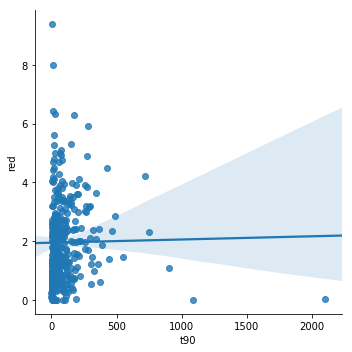

In [59]:
# BAT T90 to Redshift
sns.lmplot(x='t90', y='red', data=t90_red)

In [60]:
grb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1352 entries, 0 to 1351
Data columns (total 10 columns):
GRB                                                      1352 non-null object
Swift Trigger Number                                     1352 non-null object
BAT RA (J2000)                                           1346 non-null object
BAT Dec (J2000)                                          1346 non-null object
BAT T90                                                  1183 non-null object
BAT Fluence (15-150 keV)                                 1207 non-null object
BAT Photon Index (15-150 keV) (PL = simple power-law)    1037 non-null object
Swift Comments                                           937 non-null object
Redshift                                                 357 non-null object
Host Galaxy                                              89 non-null object
dtypes: object(10)
memory usage: 105.7+ KB


In [61]:
grb.head()

,GRB,Swift Trigger Number,BAT RA (J2000),BAT Dec (J2000),BAT T90,BAT Fluence (15-150 keV),BAT Photon Index (15-150 keV) (PL = simple power-law),Swift Comments,Redshift,Host Galaxy
0,180905A,859421,91.038,-4.592,165.3,42.0,1.6,NaN,NaN,NaN
1,180904A,859282,274.26,46.64,5.4,2.4,1.02,UVOT: no detection,NaN,NaN
2,180828A,856977,268.704,-25.791,14.0,88.0,0.89,UVOT: no detection,NaN,NaN
3,180823A,855434,210.358,14.901,80.3,78.0,1.58,UVOT: no detection,NaN,NaN
4,180821A,854578,7.739,-38.612,64.0,14.0,1.79,UVOT: no detection,NaN,NaN


In [63]:
grb_num = grb.dropna()
grb_num.head()

,GRB,Swift Trigger Number,BAT RA (J2000),BAT Dec (J2000),BAT T90,BAT Fluence (15-150 keV),BAT Photon Index (15-150 keV) (PL = simple power-law),Swift Comments,Redshift,Host Galaxy
90,170903A,770528,254.532,34.985,29.2,24.0,1.94,"Due to an observing constraint, Swift did not ...",0.886,i-band (AB) = 23.17 (GTC)
159,161108A,721234,180.776,24.905,105.1,11.0,1.85,UVOT: no detection,1.159,NOT
513,130427A,554620,173.15,27.706,162.83,3100.0,1.21,This is an extremely bright burst in all three...,0.34,"Irregular galaxy, with a broadly elliptical sh..."
530,130131B,547420,173.957,15.033,4.3,3.4,1.15,UVOT: no detection,2.539,"g = 25.7, I = 24.9 (Keck I)"
626,120118B,512003,124.862,-7.178,23.26,18.0,2.08,UVOT: no detection,2.943,I = 23.8 (Keck I)


In [64]:
grb_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 90 to 1333
Data columns (total 10 columns):
GRB                                                      30 non-null object
Swift Trigger Number                                     30 non-null object
BAT RA (J2000)                                           30 non-null object
BAT Dec (J2000)                                          30 non-null object
BAT T90                                                  30 non-null object
BAT Fluence (15-150 keV)                                 30 non-null object
BAT Photon Index (15-150 keV) (PL = simple power-law)    30 non-null object
Swift Comments                                           30 non-null object
Redshift                                                 30 non-null object
Host Galaxy                                              30 non-null object
dtypes: object(10)
memory usage: 2.6+ KB


In [72]:
grb_num['fluence'] = grb_num['BAT Fluence (15-150 keV)'].apply(lambda f : float(f))
grb_num['photon'] = grb_num['BAT Photon Index (15-150 keV) (PL = simple power-law)'].apply(lambda p : float(p))
grb_num['redshift'] = grb_num['Redshift'].apply(lambda r : float(r))

grb_num.head()

/Users/janarthan/Installs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/janarthan/Installs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/janarthan/Installs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,GRB,Swift Trigger Number,BAT RA (J2000),BAT Dec (J2000),BAT T90,BAT Fluence (15-150 keV),BAT Photon Index (15-150 keV) (PL = simple power-law),Swift Comments,Redshift,Host Galaxy,photon,redshift,fluence
90,170903A,770528,254.532,34.985,29.2,24.0,1.94,"Due to an observing constraint, Swift did not ...",0.886,i-band (AB) = 23.17 (GTC),1.94,0.886,24.0
159,161108A,721234,180.776,24.905,105.1,11.0,1.85,UVOT: no detection,1.159,NOT,1.85,1.159,11.0
513,130427A,554620,173.15,27.706,162.83,3100.0,1.21,This is an extremely bright burst in all three...,0.340,"Irregular galaxy, with a broadly elliptical sh...",1.21,0.340,3100.0
530,130131B,547420,173.957,15.033,4.3,3.4,1.15,UVOT: no detection,2.539,"g = 25.7, I = 24.9 (Keck I)",1.15,2.539,3.4
626,120118B,512003,124.862,-7.178,23.26,18.0,2.08,UVOT: no detection,2.943,I = 23.8 (Keck I),2.08,2.943,18.0


/Users/janarthan/Installs/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


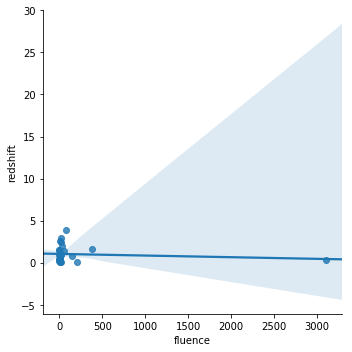

In [75]:
# BAT Fluence (15-150 keV)   to   Redshift
sns.lmplot(x='fluence', y='redshift', data=grb_num)

/Users/janarthan/Installs/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


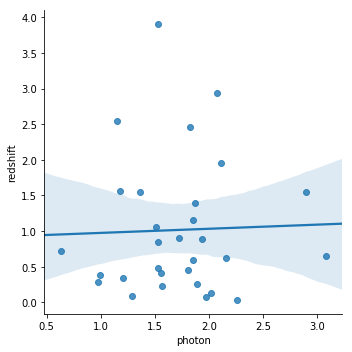

In [69]:
# BAT Photon Index (15-150 keV) (PL = simple power-law)   to   Redshift
sns.lmplot(x='photon', y='redshift', data = grb_num)